In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model
import numpy as np

In [2]:
# read the kinetic results obtained at specific concentration and temperature e.g., 200ppm and 25oC
df = pd.read_csv('adsorption_kinetics.csv')

# define x and y column
xData_25 = df.loc[:, 'minutes']
yData_25 = df.loc[:, 'qt']

In [3]:
df

,minutes,qt
0,0.000000,0.000000
1,0.054333,0.052299
2,0.108683,0.104615
3,0.163283,0.157171
4,0.217617,0.209470
...,...,...
2151,117.931000,61.657579
2152,117.985667,61.657709
2153,118.040000,61.657772
2154,118.094333,61.657827


In [4]:
# fitting function PFO
param_names = ['k1 in (min-1)', 'qmax in (mg/g)']

def PFO(x, k1, qmax):
    
    return qmax*(1-np.exp(-k1*x))

my_model = Model(PFO)
my_model.set_param_hint('k1', min=0, max=100)
my_model.set_param_hint('qmax', min=0, max=100)

result_PFO_25 = my_model.fit(yData_25, x=xData_25, k1=0, qmax=50)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_PFO_25 = result_PFO_25.best_values
best_fit_25 = result_PFO_25.best_fit
best_PFO_25 = np.array(PFO(x_eval_25, best_values_PFO_25['k1'], best_values_PFO_25['qmax']))

print(result_PFO_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_PFO_25)

[[Model]]
    Model(PFO)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 2156
    # variables        = 2
    chi-square         = 13354.6692
    reduced chi-square = 6.19993929
    Akaike info crit   = 3935.70623
    Bayesian info crit = 3947.05825
[[Variables]]
    k1:    0.01862030 +/- 1.4804e-04 (0.80%) (init = 0)
    qmax:  74.0132705 +/- 0.27710458 (0.37%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(k1, qmax) = -0.954
-------------------------------
Units ['k1 in (min-1)', 'qmax in (mg/g)'] for {'k1': 0.018620304104272067, 'qmax': 74.01327050584837}


In [5]:
# fitting function PSO
param_names = ['k2 in (g mg^-1 min^-1)', 'qmax in (mg/g)']

def PSO(x, k2, qmax):
    
    return k2*qmax**2*x/(1+k2*qmax*x)

my_model = Model(PSO)
my_model.set_param_hint('k2', min=0, max=1)
my_model.set_param_hint('qmax', min=0, max=100)

result_PSO_25 = my_model.fit(yData_25, x=xData_25, k2=0, qmax=40)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_PSO_25 = result_PSO_25.best_values
best_fit_25 = result_PSO_25.best_fit
best_PSO_25 = np.array(PSO(x_eval_25, best_values_PSO_25['k2'], best_values_PSO_25['qmax']))

print(result_PSO_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_PSO_25)

[[Model]]
    Model(PSO)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 2156
    # variables        = 2
    chi-square         = 21049.7424
    reduced chi-square = 9.77239664
    Akaike info crit   = 4916.73419
    Bayesian info crit = 4928.08621
[[Variables]]
    k2:    1.6197e-04 +/- 3.2553e-06 (2.01%) (init = 0)
    qmax:  99.9999997 +/- 0.64346351 (0.64%) (init = 40)
[[Correlations]] (unreported correlations are < 0.100)
    C(k2, qmax) = -0.989
-------------------------------
Units ['k2 in (g mg^-1 min^-1)', 'qmax in (mg/g)'] for {'k2': 0.00016197485834890113, 'qmax': 99.99999969243886}


In [6]:
# fitting function WM
param_names = ['kwm in (mg g^-1 min^-0.5))', 'C (dimensionless)']

def WM(x, kwm, C):
    
    return kwm*x**(0.5)+C

my_model = Model(WM)
my_model.set_param_hint('kwm', min=0, max=5)
my_model.set_param_hint('C', min=0, max=100)

result_WM_25 = my_model.fit(yData_25, x=xData_25, kwm=0, C=40)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_WM_25 = result_WM_25.best_values
best_fit_25 = result_WM_25.best_fit
best_WM_25 = np.array(WM(x_eval_25, best_values_WM_25['kwm'], best_values_WM_25['C']))

print(result_WM_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_WM_25)

[[Model]]
    Model(WM)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 2156
    # variables        = 2
    chi-square         = 304416.182
    reduced chi-square = 141.325990
    Akaike info crit   = 10676.5043
    Bayesian info crit = 10687.8563
[[Variables]]
    kwm:  3.23687521 +/- 0.10280448 (3.18%) (init = 0)
    C:    23.6750594 +/- 0.68590947 (2.90%) (init = 40)
[[Correlations]] (unreported correlations are < 0.100)
    C(kwm, C) = -0.943
-------------------------------
Units ['kwm in (mg g^-1 min^-0.5))', 'C (dimensionless)'] for {'kwm': 3.236875206189889, 'C': 23.67505936126541}


In [7]:
# fitting function Bangham
param_names = ['kb in (min^-n))', 'qmax (mg/g)', 'n (dimensionless)']

def Bangham(x, kb, n, qmax):
    
    return qmax*(1-np.exp(-kb*x**n))

my_model = Model(Bangham)
my_model.set_param_hint('qmax', min=0, max=80)
my_model.set_param_hint('kb', min=0, max=1)
my_model.set_param_hint('n', min=0, max=2)

result_Bangham_25 = my_model.fit(yData_25, x=xData_25, kb=0, n=1, qmax=50)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_Bangham_25 = result_Bangham_25.best_values
best_fit_25 = result_Bangham_25.best_fit
best_Bangham_25 = np.array(Bangham(x_eval_25, 
                                   best_values_Bangham_25['kb'], best_values_Bangham_25['n'], best_values_Bangham_25['qmax']))

print(result_Bangham_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_Bangham_25)

[[Model]]
    Model(Bangham)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 2156
    # variables        = 3
    chi-square         = 1555.63846
    reduced chi-square = 0.72254457
    Akaike info crit   = -697.650711
    Bayesian info crit = -680.622682
[[Variables]]
    kb:    0.00477921 +/- 6.0036e-05 (1.26%) (init = 0)
    n:     1.44137783 +/- 0.00369282 (0.26%) (init = 1)
    qmax:  63.2961229 +/- 0.05452352 (0.09%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(kb, n)    = -0.987
    C(n, qmax)  = -0.683
    C(kb, qmax) = 0.582
-------------------------------
Units ['kb in (min^-n))', 'qmax (mg/g)', 'n (dimensionless)'] for {'kb': 0.0047792127578742405, 'n': 1.4413778262936077, 'qmax': 63.29612291707935}


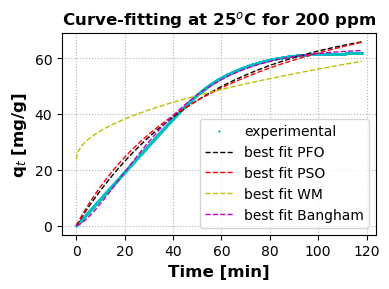

In [8]:
# define the size of the figure
fig, ax = plt.subplots(figsize = (4,3))

# plot experimental data
plt.plot(xData_25, yData_25, 'c+', mfc = "none", label='experimental', markersize=1)

# plot fitted data
ax.plot(x_eval_25, best_PFO_25, 'k--', label='best fit PFO', linewidth = 1)
ax.plot(x_eval_25, best_PSO_25, 'r--', label='best fit PSO', linewidth = 1)
ax.plot(x_eval_25, best_WM_25, 'y--', label='best fit WM', linewidth = 1)
ax.plot(x_eval_25, best_Bangham_25, 'm--', label='best fit Bangham', linewidth = 1)

# edit plot
ax.legend()
ax.set_xlabel("Time [min]", fontsize=12, fontweight='bold')
ax.set_ylabel("q$_t$ [mg/g]", fontsize=12, fontweight='bold')
ax.set_title("Curve-fitting at 25$^o$C for 200 ppm", fontsize=12, fontweight='bold', loc = 'center')
ax.grid(linestyle = ':')
fig.tight_layout()

In [9]:
aic_df = pd.DataFrame({'model':['PFO', 'PSO', 'WM', 'Bangham'],
                       'aic':[result_PFO_25.aic, result_PSO_25.aic,
                              result_WM_25.aic, result_Bangham_25.aic]})

aic_min = aic_df[aic_df['aic'] == aic_df['aic'].min()]

print('The best model is %s with aic value of %2f' %(aic_min.model.iloc[0], aic_min.aic.iloc[0]))

The best model is Bangham with aic value of -697.650711


*Note that reduced chi-square can also be used for assessing the models with lower value indicating better convergence*

**Given that Banham model was better to describe the process it was also used at 3 different temperatures. After calculating the rate constants at 4 different temperatures a modified Arrhenius plot was used to help estimate preexponential factor and activation energy**

In [10]:
df_kin = pd.DataFrame({'Value':[0.00478, 0.00583, 0.00728, 0.01956],
                      'Temperature':[298.15, 308.15, 323.15, 373.15]})

# find the average temperature
Taver = df_kin.Temperature.mean()

# define x and y column
xData = df_kin.loc[:, 'Temperature']
yData = df_kin.loc[:, 'Value']

### Modified Arrhenius

Create a plot of ($k$ vs $T$) to calculate parameters ($A$, E$_a$) using non linear methods:

$ k = Aexp(-\frac{E_a}{R}(\frac{1}{T} - \frac{1}{T_{mean}}) $

[[Model]]
    Model(mod_Arrhenius)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 4
    # variables        = 2
    chi-square         = 4.7649e-07
    reduced chi-square = 2.3824e-07
    Akaike info crit   = -59.7724624
    Bayesian info crit = -60.9998737
[[Variables]]
    Ea:  18300.5446 +/- 845.949097 (4.62%) (init = 10000)
    A:   0.00824232 +/- 2.9429e-04 (3.57%) (init = 10000)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ea, A) = -0.787


The activation energy was calculated to be 18301 J/mol


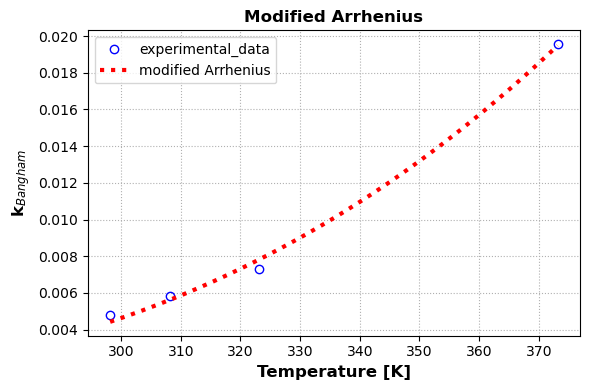

In [12]:
#Fitting function PFO
def mod_Arrhenius(x, Ea, A):
    
    return A*np.exp(-Ea*(1/x - 1/Taver)*(1/8.314))

my_model = Model(mod_Arrhenius)
my_model.set_param_hint('Ea', min=0, max=np.inf)
my_model.set_param_hint('A', min=0, max=np.inf)

result_Arr = my_model.fit(yData, x=xData, Ea=10000, A=10000)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values_Arr = result_Arr.best_values
best_fit_Arr = result_Arr.best_fit
best_mod_Arrhenius = np.array(mod_Arrhenius(x_eval, best_values_Arr['Ea'], best_values_Arr['A']))

print(result_Arr.fit_report())

# define the size of the figure
fig = plt.figure(figsize=(6,4))

# plot experimental data
plt.plot(xData, yData, "bo", mfc = "none", label="experimental_data")

#Plot the fitted function - %.2f means that I want to present 2 digits
plt.plot(x_eval, best_mod_Arrhenius, "r:", label="modified Arrhenius", lw = 3)

#plot properties
plt.legend(frameon=True)
plt.grid(linestyle='dotted')
plt.legend(facecolor='white')
plt.xlabel("Temperature [K]", fontsize=12, fontweight='bold')
plt.ylabel("k$_{Bangham}$", fontsize=12, fontweight='bold')
plt.title("Modified Arrhenius", fontsize=12, fontweight='bold')
plt.tight_layout()

print('\n')
print('The activation energy was calculated to be %.0f J/mol' %best_values_Arr['Ea'])